<a href="https://colab.research.google.com/github/tolexworship/Addition-in-python/blob/main/sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Team members : 
1. Stephanie Itakpe

2. Tolulope Erinosho (WTF/23/DS/D/085), tolulope.erinosho@womentechsters.org





Background:


This competition is designed to help you get started with DataCamp Competitions and familiarize yourself with how competitions work. You work in the accounting department of a company that sells motorcycle parts. The company operates three warehouses in a large metropolitan area. You’ve recently learned data manipulation and plotting, and are helping your colleague analyze past sales data. Your colleague wants to capture sales by payment method. She also needs to know the average unit price for each product line.


Create a report to answer your colleague's questions. Include:

1. What are the total sales for each payment method?
2. What is the average unit price for each product line?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
5. Summarize your findings.

In [38]:
# To import the plot libraries
import matplotlib.pyplot as plt
import pandas as pd
# To read the given data set as a dataframe
df = pd.read_csv("/content/sales_data.csv")

In [3]:
# To get information about the dataset, we invoke this syntax
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1000 non-null   object 
 1   warehouse     1000 non-null   object 
 2   client_type   1000 non-null   object 
 3   product_line  1000 non-null   object 
 4   quantity      1000 non-null   int64  
 5   unit_price    1000 non-null   float64
 6   total         1000 non-null   float64
 7   payment       1000 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 62.6+ KB


In [4]:
# To view the first five columns including the header of the dataframe
df.head()

,date,warehouse,client_type,product_line,quantity,unit_price,total,payment
0,2021-06-01,Central,Retail,Miscellaneous,8,16.85,134.83,Credit card
1,2021-06-01,North,Retail,Breaking system,9,19.29,173.61,Cash
2,2021-06-01,North,Retail,Suspension & traction,8,32.93,263.45,Credit card
3,2021-06-01,North,Wholesale,Frame & body,16,37.84,605.44,Transfer
4,2021-06-01,Central,Retail,Engine,2,60.48,120.96,Credit card


In [5]:
# To check for any null value in the dataframe
df.isna().sum()

date            0
warehouse       0
client_type     0
product_line    0
quantity        0
unit_price      0
total           0
payment         0
dtype: int64

In [9]:
# QUESTION ONE
#What are the total sales for each payment method?

# To compute the solution to this question, we will use ‘groupby’ syntax to categorize the information in the “payment” column 
# With the corresponding total sum for each payment method.  

df.groupby('payment').total.sum()

payment
Cash            19199.10
Credit card    110271.57
Transfer       159642.33
Name: total, dtype: float64

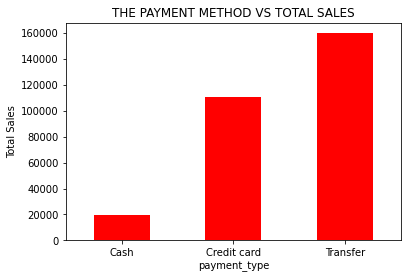

In [15]:
#Thereafter, we will graphically display the obtained result using bar chart, with the payment method on the x-axis 
#and the corresponding total sales on the y-axis.

payment_plot.plot(kind='bar', xlabel='payment_type', ylabel='Total Sales', title='THE PAYMENT METHOD VS TOTAL SALES', color ="red")
plt.xticks(rotation=0)
plt.show()

In [22]:
# QUESTION TWO:  What is the average unit price for each product line?

# From the information given, the product line depicts different type of products purchased. To evaluate the average unit price of each,
# we will obtain the ‘mean’ of each product.

df.groupby('product_line').unit_price.mean()


product_line
Breaking system          17.740522
Electrical system        25.585130
Engine                   60.091803
Frame & body             42.832229
Miscellaneous            22.810738
Suspension & traction    33.969868
Name: unit_price, dtype: float64

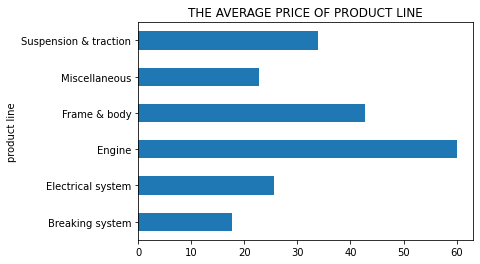

In [24]:
# We will display the result graphically using horizontal barchart, “barh” with the graph of each product line on the x-axis
# and the corresponding average price on the y-axis.

product_line = df.groupby('product_line').unit_price.mean()
product_line.plot(kind='barh', xlabel='product line', ylabel='average price',
                  title='THE AVERAGE PRICE OF PRODUCT LINE')
plt.xticks()
plt.show()

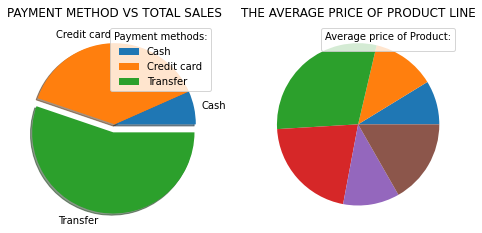

In [36]:
# QUESTION THREE: Create plots to visualize findings for questions 1 and 2.

# To compute the solution to this question, we will use this approach in addition to the profiles shown in question 1 and 2 above
# For real time visualization and fair comparison of our findings in questions 1 and 2, use will be made of the ‘subplot’ function,
# comprising of 1 row and 2 columns 
# For question 1, we first obtained the numerical values of each payment method, so as to create an array list and then display
# the distribution in a pie chart as shown in subplot as[0]. The highest mode of payment is exploded as shown


import numpy as np

total_sales_mtd = np.array([19199.10, 110271.57, 159642.33])
sales_labels = ["Cash", "Credit card", "Transfer"]
myexplode = [0, 0, 0.1]
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 5))
ax[0].pie(total_sales_mtd, labels = sales_labels, explode = myexplode, shadow = True)
ax[0].legend(title = "Payment methods:")
ax[0].set_title("PAYMENT METHOD VS TOTAL SALES", fontsize=12)

# For question 2, we will display the average pricce distribution for each product line
data = df.groupby('product_line').unit_price.mean()
ax[1].pie(data)
ax[1].set_title("THE AVERAGE PRICE OF PRODUCT LINE", fontsize=12)
ax[1].legend(title = "Average price of Product:")
plt.show()

In [39]:
# QUESTION FOUR: [Optional] Investigate further (e.g., average purchase value by client type, total purchase value by product line, etc.)
# 4a. The average purchase value by client type

df.groupby('client_type').total.mean()

client_type
Retail       167.058929
Wholesale    709.521467
Name: total, dtype: float64

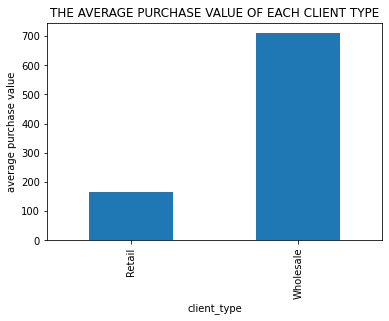

In [84]:
 # Graphical representation 
client_plot.plot(kind='bar', xlabel='client_type', ylabel='average purchase value',title ='THE AVERAGE PURCHASE VALUE OF EACH CLIENT TYPE')
plt.xticks()
plt.show()

In [52]:
# 4b Evaluate the total purchase value by product line

product_total = df.groupby('product_line').total.sum().sort_values(ascending=True)
product_total


product_line
Miscellaneous            27165.82
Engine                   37945.38
Breaking system          38350.15
Electrical system        43612.71
Frame & body             69024.73
Suspension & traction    73014.21
Name: total, dtype: float64

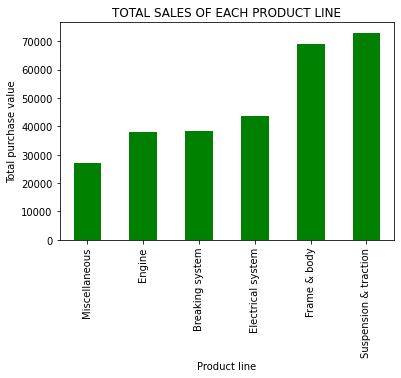

In [65]:
# Graphical representation
product_total.plot(kind='bar', xlabel='Product line', ylabel='Total purchase value',
                   title='TOTAL SALES OF EACH PRODUCT LINE',color = "green")

plt.xticks(rotation=90)
plt.show()

In [75]:
### 4c We will investigate the correlation between the three warehouses and the quantity of each product sold in each location

# We will use pivot table in pandas as it's a suitable function in this regard

df.pivot_table(index=['warehouse'], columns=["product_line"], values=['quantity'], aggfunc=[np.sum])

sum                                        \
                    quantity                                         
product_line Breaking system Electrical system Engine Frame & body   
warehouse                                                            
Central                 1024               838    449          698   
North                    605               607    122          675   
West                     501               253     56          246   

                                                  
                                                  
product_line Miscellaneous Suspension & traction  
warehouse                                         
Central                538                   980  
North                  379                   866  
West                   259                   299

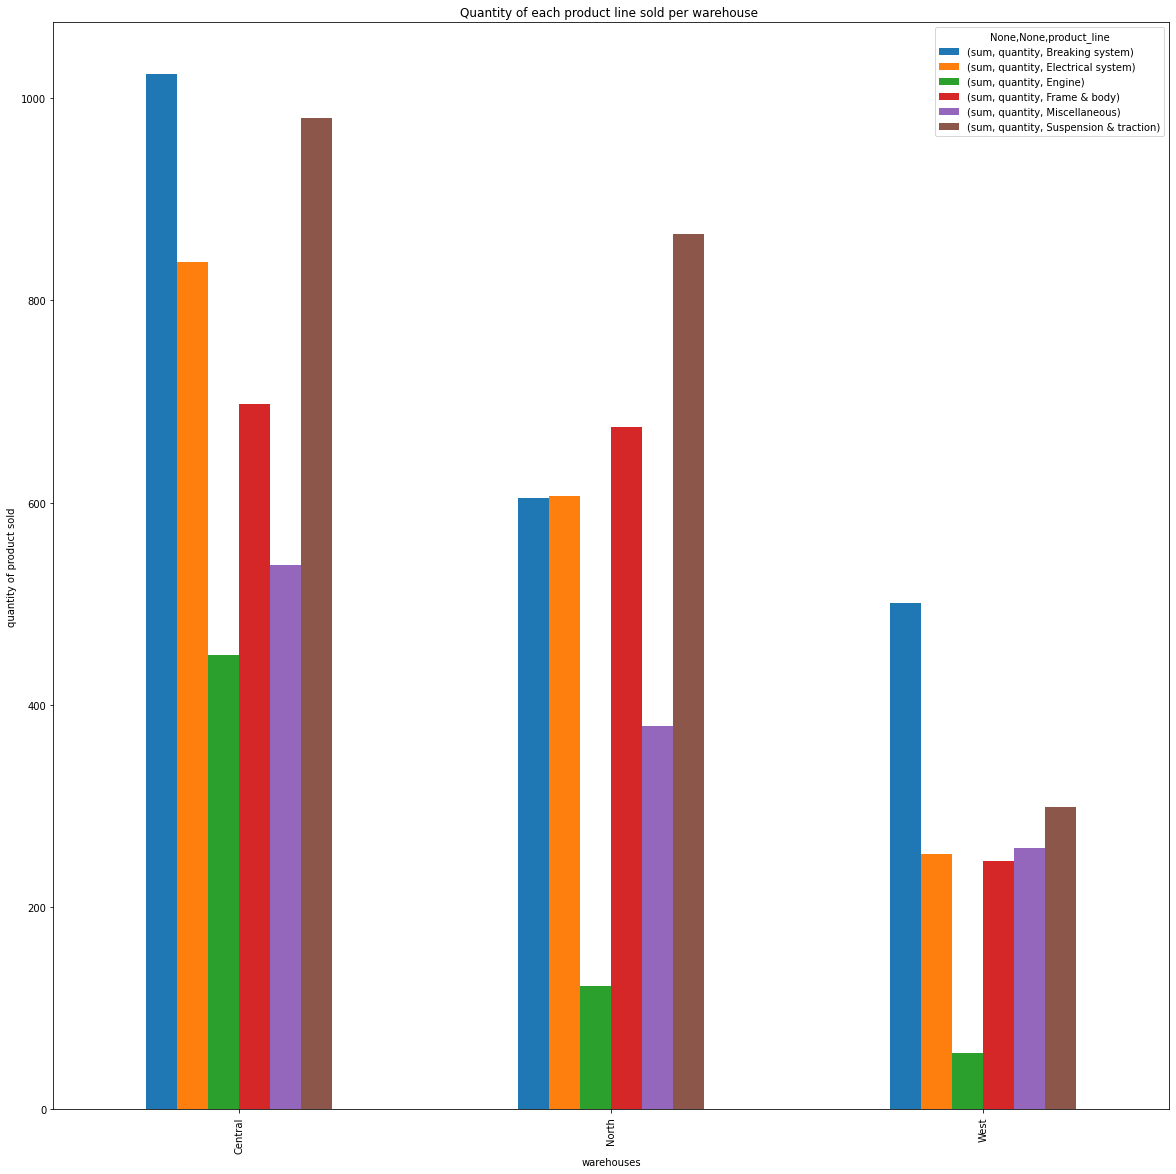

In [80]:
warehouse_prodline= df.pivot_table(index=['warehouse'], columns=["product_line"], values=['quantity'], aggfunc=[np.sum])
warehouse_prodline.plot(kind='bar', xlabel='warehouses', ylabel='quantity of product sold', title='Quantity of each product line sold per warehouse ', figsize=(20,20))
plt.show()

In [81]:
# - Let's investigate further: Which warehouse has the highest total sale?

df.groupby('warehouse').total.sum()

warehouse
Central    141982.88
North      100203.63
West        46926.49
Name: total, dtype: float64

In [82]:
# What category of client patronize the warehouse with the highest total sale?
# We will use the crosstab function in pandas for the comparison

pd.crosstab(df.warehouse, df.client_type)

client_type,Retail,Wholesale
warehouse,,
Central,371,109
North,263,77
West,141,39


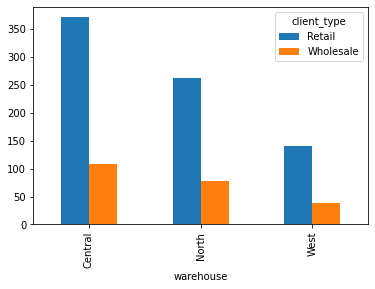

In [83]:
warehouse_comparison = pd.crosstab(df.warehouse, df.client_type)
warehouse_comparison.plot(kind='bar')
plt.show()

Conclusion
*  From the result obtained in question 1, the most prefered mode of payment is mobile transfer method, followed by credit card and cash payment mode. This could be due to cashless policy been mostly adopted in the three warehouse locations.

* Result obtained in question 2 revealed that motorcycle engine is the most expensive spare parts followed by the frame work compenents. Hence, adequate preventive measures must be put in place to avoid damage during storage.

* As expected, result of 4a indicated that the wholesalers have more purchasing power than the retailers

* Results obtained in 4b indicated that most maintenance work were carried out on the framework and body parts of most motorcyles within this period. This might be due to bad road networks, careless driving and so on


* Results of 4c and 4d revealed that highest sales of product was experienced in the Central zone , with braking system and framework body parts products having the highest sale in this region. Also, of all the three zones, most engine parts are sold in this region within this period, with retailers having more patronage. Adulterated fuel or aged motorcycles might be responsible for this.

However, direct sale to the retailers is more profitable than the wholesaler which is good for the business

